In [3]:
# load binary file
import numpy as np
import time
import suite2p
from suite2p.run_s2p import run_s2p
import imp
imp.reload(suite2p)

def tic():
    return time.time()
def toc(i0):
    return time.time() - i0

ops = {
    'nplanes': 1,
    'diameter': 12,
    'tau': 2.,
    'fs': 2.5,
    'data_path': ['C:/Drive/suite2python/data1/'],
    #'data_path': ['C:/Users/carse/github/tiffs/'],
    #'save_path0': 'C:/',
    #'data_path': 'C:\Drive\suite2python\data',
    'subfolders': ['1', '2', '5'],
    'num_workers': 0,
    'num_workers_roi': -1,
    'reg_tif':False,
    'max_iterations':10,    
      }


# copy tiff to a binary
ops1 = run_s2p(ops)

found ops1 and pre-registered binaries
C:/Drive/suite2python/data1/suite2p\plane0\data.bin
overwriting ops1 with new ops
skipping registration...
SVD computed in 33.01 sec
cells: 215, cost: 0.6009, time: 59.3287
cells: 369, cost: 0.5893, time: 81.9435
cells: 460, cost: 0.5839, time: 106.2762
cells: 506, cost: 0.5815, time: 131.0556
cells: 520, cost: 0.5808, time: 156.2275
cells: 520, cost: 515882.9062, time: 191.4732
cells: 520, cost: 509372.9688, time: 209.4841
cells: 520, cost: 507856.4375, time: 227.6083
time 233.0348. Found 520 ROIs
extracted 0/10000 frames in 3.77 sec
extracted 5000/10000 frames in 22.38 sec
extracted 10000/10000 frames in 36.91 sec
time 278.4558. Extracted fluorescence from 520 ROIs
time 298.4092. Detected spikes in 520 ROIs
results saved to C:/Drive/suite2python/data1/suite2p\plane0
finished all tasks in 298.7913 sec


In [11]:
stat = np.load('C:\Drive\suite2python\data1\suite2p\plane0\stat.npy')
stat = stat.item()

stats = np.zeros((len(stat),3))
for k in range(len(stat)):
    stats[k,0] = stat[k]['skew']
    stats[k,1] = stat[k]['compact']
    stats[k,2] = stat[k]['footprint']
    

In [10]:
from scipy import io
cl = io.loadmat('C:\Github\old\Suite2P\configFiles\classifier.mat')

model = {}
model['hists'] = cl['prior'][0][0][3][:, [1, 2, 3], :]
model['grid'] = cl['prior'][0][0][4][:, [1, 2, 3]]
model['statclass'] = ['skew', 'compact', 'footprint']
model['trainfiles'] = []

np.save('C:\Github\suite2p\model.npy', model)

In [12]:
ncells, nstats = stats.shape
grid = model['grid']
hists = model['hists']
logp = np.zeros((ncells,2), np.float32)

for n in range(nstats):
    x = stats[:,n]
    x[x<grid[0,n]]   = grid[0,n]
    x[x>grid[-1,n]]  = grid[-1,n]
    ibin = np.digitize(x, grid[:,n], right=True) - 1
    logp = logp + np.log(np.squeeze(hists[ibin,n,:])+1e-5)

In [29]:
np.mean(rs[:,0]-rs[:,1] > 0)

0.1596153846153846

In [28]:
p = np.ones((1,2),np.float32)
p = p / p.sum()
for n in range(10):
    L = logp + np.log(p)
    L = L - np.expand_dims(L.max(axis=1), axis=1)
    rs = np.exp(L) + 1e-5
    rs = rs / np.expand_dims(rs.sum(axis=1), axis=1)
    p = rs.mean(axis=0)

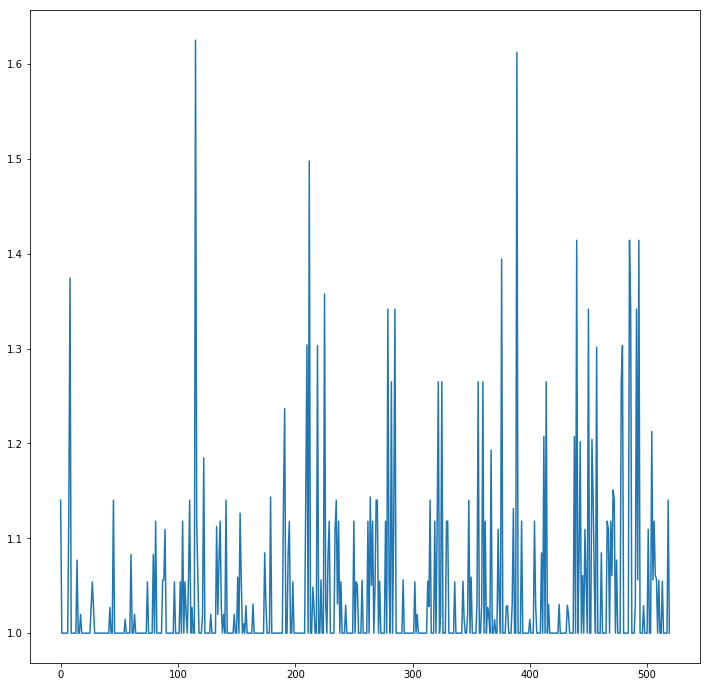

In [7]:
from matplotlib import pyplot as plt

plt.figure(figsize=(12,12))
plt.plot(x)
plt.show()

In [199]:
stat[n]['med']

[389.0, 88.5]